In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

df_train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [ ]:
for df in [df_train, df_test]:
  df.drop(columns="id" , axis=1 , inplace=True)

In [ ]:
print(f"Training dataset shape: {df_train.shape}")
print(f"Testing dataset shape: {df_test.shape}")

Training dataset shape: (1200000, 20)
Testing dataset shape: (800000, 19)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-

In [ ]:
def missing_val_percentage(df):

    # Calculate percentage of missing values
    missing_percentage = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({
        'column_name': df.columns,
        'percent_missing': missing_percentage
    })

    # Sort values by percentage missing in descending order
    missing_value_df.sort_values("percent_missing", inplace=True, ascending=False)

    # Reset index and drop the old one
    missing_value_df.reset_index(drop=True, inplace=True)

    # Display the resulting dataframe
    print(missing_value_df)

# Example usage
missing_val_percentage(df_train)


             column_name  percent_missing
0        Previous Claims        30.335750
1             Occupation        29.839583
2           Credit Score        11.490167
3   Number of Dependents         9.139333
4      Customer Feedback         6.485333
5           Health Score         6.173000
6          Annual Income         3.745750
7                    Age         1.558750
8         Marital Status         1.544083
9            Vehicle Age         0.000500
10    Insurance Duration         0.000083
11              Location         0.000000
12           Policy Type         0.000000
13                Gender         0.000000
14       Education Level         0.000000
15     Policy Start Date         0.000000
16        Smoking Status         0.000000
17    Exercise Frequency         0.000000
18         Property Type         0.000000
19        Premium Amount         0.000000


In [ ]:
missing_val_percentage(df_test)

             column_name  percent_missing
0        Previous Claims        30.350250
1             Occupation        29.890625
2           Credit Score        11.431375
3   Number of Dependents         9.141250
4      Customer Feedback         6.534500
5           Health Score         6.181125
6          Annual Income         3.732500
7                    Age         1.561125
8         Marital Status         1.542000
9            Vehicle Age         0.000375
10    Insurance Duration         0.000250
11     Policy Start Date         0.000000
12    Exercise Frequency         0.000000
13        Smoking Status         0.000000
14           Policy Type         0.000000
15                Gender         0.000000
16              Location         0.000000
17       Education Level         0.000000
18         Property Type         0.000000


Handling Missing Values

In [ ]:
for df in [df_train , df_test]:
  df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])

In [ ]:
# let's drop Previous Claims and Occupation column because they have the highest missing values

In [ ]:
# have option to make binary column for rows with missing values for OCCUAPATION and previous claims
# sometimes can improve model performance

# or also use iterative imputer which predicts the missing values

In [ ]:
numeric_columns = df_train.select_dtypes(include="number").columns
numeric_columns = numeric_columns.tolist()

date_col = ["Policy Start Date"]

categorical_cols = df_train.select_dtypes(exclude="number").columns
categorical_cols = categorical_cols.tolist()


In [ ]:
numeric_columns

['Age',
 'Annual Income',
 'Number of Dependents',
 'Health Score',
 'Previous Claims',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration',
 'Premium Amount']

In [ ]:
categorical_cols

['Gender',
 'Marital Status',
 'Education Level',
 'Occupation',
 'Location',
 'Policy Type',
 'Policy Start Date',
 'Customer Feedback',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type']

In [ ]:
# fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 20), sharex=False)
# for ax, col in zip(axes, numeric_columns):
#     sns.histplot(data=df_train, x=col, kde=True, bins=30, ax=ax)
#     ax.set_title(f'Distribution of {col}')

# plt.tight_layout()
# plt.show()

Everything looks normally distrbuted except for Premium Amount which quite skewed to the right (positively skewed). We can do the skew test to find out the skewness of the column. If it is normally distributed , the score should be about zero

In [ ]:
from scipy.stats import skew

def skew_test(cols):
  skew_df = pd.DataFrame({
      "Columns": cols,
      "Skewness_score": [skew(df_train[col], nan_policy="omit") for col in cols]
  })

  print(skew_df)

skew_test(numeric_columns)

                Columns  Skewness_score
0                   Age       -0.012532
1         Annual Income        1.470356
2  Number of Dependents       -0.013255
3          Health Score        0.282187
4       Previous Claims        0.905319
5           Vehicle Age       -0.020409
6          Credit Score       -0.113572
7    Insurance Duration       -0.008793
8        Premium Amount        1.240914


Annual Income , Previous Claims and Premium Amount are positevely skewed and hence need to be handle to normalise the distibution.

- Lets scale the Premium Amount data first

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_train["Premium Amount"] = np.log(df_train["Premium Amount"] + 1)

skew(df_train["Premium Amount"])

-1.2558873578553627

In [ ]:
from scipy.stats import boxcox

# Box-Cox only works for strictly positive data
df_train["Premium Amount"], _ = boxcox(df_train["Premium Amount"] + 1e-6)

# Check skewness again
skewness = skew(df_train["Premium Amount"], nan_policy="omit")
print("Skewness after Box-Cox:", skewness)


Skewness after Box-Cox: -0.1405701128860488


In [ ]:
# for col in categorical_cols:
#   plt.figure(figsize=(4,3))
#   sns.countplot(x=col , data = df_train)
#   plt.title(f'{col}')
#   plt.show()

In [ ]:
missing_val_percentage(df_train)

             column_name  percent_missing
0        Previous Claims        30.335750
1             Occupation        29.839583
2           Credit Score        11.490167
3   Number of Dependents         9.139333
4      Customer Feedback         6.485333
5           Health Score         6.173000
6          Annual Income         3.745750
7                    Age         1.558750
8         Marital Status         1.544083
9            Vehicle Age         0.000500
10    Insurance Duration         0.000083
11              Location         0.000000
12           Policy Type         0.000000
13                Gender         0.000000
14       Education Level         0.000000
15     Policy Start Date         0.000000
16        Smoking Status         0.000000
17    Exercise Frequency         0.000000
18         Property Type         0.000000
19        Premium Amount         0.000000


All data seems to be balanced here which is a good thing.

🛠️ Handle Missing Values & Preprocessing Pipeline

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler , OneHotEncoder, OrdinalEncoder

# Numeric columns
simp_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_train[numeric_columns] = simp_imputer.fit_transform(df_train[numeric_columns])

# Scaling numerical columns
scaler = StandardScaler()
df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])

# Categorical columns
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_train[categorical_cols] = mode_imputer.fit_transform(df_train[categorical_cols])

one_hot = ["Gender" , "Marital Status" , "Occupation" , "Location" , "Smoking Status" , "Exercise Frequency" , "Property Type" , "Education Level" , "Policy Type" , "Customer Feedback"]
ordinal = ["Education Level" , "Policy Type" , "Customer Feedback"]

education_order = ["Bachelor's", "Master's", 'High School', 'PhD']
policy_order = ['Basic', 'Comprehensive', 'Premium']
customer_order = [['Poor', 'Average', 'Good']]

# for col in ["Education Level", "Policy Type", "Customer Feedback"]:
#     df_train[col] = df_train[col].astype(str)

# # # ordinal encoding first then one hot
# # ordinal_encoder = OrdinalEncoder(categories=[education_order, policy_order, customer_order])

# # # Fit and transform the ordinal columns
# # df_train[["Education Level", "Policy Type", "Customer Feedback"]] = ordinal_encoder.fit_transform(
# #     df_train[["Education Level", "Policy Type", "Customer Feedback"]]
# # )

# Apply one-hot encoding to the specified columns
df_train = pd.get_dummies(df_train, columns=one_hot, drop_first=True)


# Confirm transformation
df_train.head()


# numerical_pipeline = Pipeline(
#     [
#         ('imputer', SimpleImputer(strategy="mean")),
#         ('scale', StandardScaler())
#     ]
# )

# # Categorical pipeline
# categorical_pipeline = Pipeline(
#     [
#         ('imputer', SimpleImputer(strategy="most_frequent")),
#         ('one-hot', OneHotEncoder(drop="first", handle_unknown="ignore"))
#     ]
# )

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_pipeline, numeric_columns),
#         ('cat', categorical_pipeline, categorical_cols)
#     ]
# )

# df_train_preprocessed = preprocessor.fit_transform(df_train)



# Check for missing values

# df.drop(columns = {"Policy Start Date" , "id"} , inplace = True)


# imputer_cols = ["Previous Claims"]
# categorical_cols = ["Occupation" ,"Customer Feedback", "Marital Status" , "Location" , "Policy Type" , "Smoking Status" , "Exercise Frequency" , "Property Type"]
# numerical_cols = ["Credit Score", "Number of Dependents"]
# less_percentage = ["Health Score", "Annual Income", "Age", "Vehicle Age", "Insurance Duration",
#                   "Premium Amount" , "Insurance Duration"]

# imputer = IterativeImputer(estimator=DecisionTreeRegressor(), max_iter=10, random_state=42)
# simp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# simp_imputer = simp_mean.fit(df[less_percentage])

# # filling up numeric columns with low missing values with mean
# df[less_percentage] = simp_imputer.transform(df[less_percentage])

# # using iterative imputer for numeric columns > 10% missing values
# df[numerical_cols] = imputer.fit_transform(df[numerical_cols])
# df[imputer_cols] = imputer.fit_transform(df[imputer_cols])


# # filling up with categorical columns with mode with below 10% missing values
# for col in categorical_cols:
#     df[col].fillna(df[col].mode()[0], inplace=True)


# print(df.isnull().sum())


,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Premium Amount,Gender_Male,Marital Status_Married,Marital Status_Single,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House,Education Level_High School,Education Level_Master's,Education Level_PhD,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor
0,-1.648471,-0.718893,-0.747535,-0.255071,1.215746,1.286338,-1.565702e+00,-0.007023,2023-12-23 15:21:39.134960,1.635053,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,True
1,-0.159711,-0.033804,0.732830,-0.849704,-0.003278,0.420713,7.163281e-01,-1.163391,2023-06-12 15:21:39.111551,0.651311,False,False,False,False,False,False,False,True,True,False,False,False,True,False,True,False,True,False,False,False
2,-1.350719,-0.226258,0.732830,1.824212,-0.003278,0.766963,-1.611408e-15,-0.777935,2023-09-30 15:21:39.221386,-0.460062,True,False,False,True,False,True,False,True,False,False,True,False,True,True,False,False,False,True,True,False
3,-1.499595,3.456006,-0.007353,-1.241521,-0.003278,-1.656787,-1.601137e+00,-1.548847,2024-06-12 15:21:39.226954,-0.151626,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
4,-1.499595,0.218738,-0.747535,-0.443102,-1.222302,-0.271787,3.597138e-02,-0.392479,2021-12-01 15:21:39.252145,1.089394,True,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True


In [ ]:
df_train.isnull().sum()

,0
Age,0
Annual Income,0
Number of Dependents,0
Health Score,0
Previous Claims,0
Vehicle Age,0
Credit Score,0
Insurance Duration,0
Policy Start Date,0
Premium Amount,0


Handling DATE column

In [ ]:
for col in df_train.columns:
  df_train["Policy_Start_Year"] = df_train["Policy Start Date"].dt.year
  df_train["Policy_Start_Month"] = df_train["Policy Start Date"].dt.month
  df_train["Policy_Start_day"] = df_train["Policy Start Date"].dt.day

In [ ]:
df_train.head()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Premium Amount,Gender_Male,Marital Status_Married,Marital Status_Single,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House,Education Level_High School,Education Level_Master's,Education Level_PhD,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Policy_Start_Year,Policy_Start_Month,Policy_Start_day
0,-1.648471,-0.718893,-0.747535,-0.255071,1.215746,1.286338,-1.565702e+00,-0.007023,2023-12-23 15:21:39.134960,1.635053,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,True,2023,12,23
1,-0.159711,-0.033804,0.732830,-0.849704,-0.003278,0.420713,7.163281e-01,-1.163391,2023-06-12 15:21:39.111551,0.651311,False,False,False,False,False,False,False,True,True,False,False,False,True,False,True,False,True,False,False,False,2023,6,12
2,-1.350719,-0.226258,0.732830,1.824212,-0.003278,0.766963,-1.611408e-15,-0.777935,2023-09-30 15:21:39.221386,-0.460062,True,False,False,True,False,True,False,True,False,False,True,False,True,True,False,False,False,True,True,False,2023,9,30
3,-1.499595,3.456006,-0.007353,-1.241521,-0.003278,-1.656787,-1.601137e+00,-1.548847,2024-06-12 15:21:39.226954,-0.151626,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,2024,6,12
4,-1.499595,0.218738,-0.747535,-0.443102,-1.222302,-0.271787,3.597138e-02,-0.392479,2021-12-01 15:21:39.252145,1.089394,True,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,2021,12,1


In [ ]:
df_train.drop(columns={"Policy Start Date"} , inplace = True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 32 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Age                          1200000 non-null  float64
 1   Annual Income                1200000 non-null  float64
 2   Number of Dependents         1200000 non-null  float64
 3   Health Score                 1200000 non-null  float64
 4   Previous Claims              1200000 non-null  float64
 5   Vehicle Age                  1200000 non-null  float64
 6   Credit Score                 1200000 non-null  float64
 7   Insurance Duration           1200000 non-null  float64
 8   Premium Amount               1200000 non-null  float64
 9   Gender_Male                  1200000 non-null  bool   
 10  Marital Status_Married       1200000 non-null  bool   
 11  Marital Status_Single        1200000 non-null  bool   
 12  Occupation_Self-Employed     1200000 non-n

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prepare data
X = df_train.drop(columns=["Premium Amount"])
y = df_train["Premium Amount"]

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = lgb.LGBMRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 5, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_val)

# Ensure there are no non-positive values for log1p
y_val_safe = np.maximum(y_val, 1e-6)
y_pred_safe = np.maximum(y_pred, 1e-6)

# Evaluate the model

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_val, y_pred)

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# RMSLE (Root Mean Squared Logarithmic Error)
y_val_log = np.log1p(y_val_safe)
y_pred_log = np.log1p(y_pred_safe)

rmsle = np.sqrt(mean_squared_error(y_val_log, y_pred_log))

# R² (Coefficient of Determination)
r2 = r2_score(y_val, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.4f}")
print(f"R-squared (R²): {r2:.4f}")


In [ ]:
df_train.isnull().sum()

,0
Age,0
Annual Income,0
Number of Dependents,0
Health Score,0
Previous Claims,0
Vehicle Age,0
Credit Score,0
Insurance Duration,0
Premium Amount,0
Gender_Male,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   Age                          1200000 non-null  float64       
 1   Annual Income                1200000 non-null  float64       
 2   Number of Dependents         1200000 non-null  float64       
 3   Health Score                 1200000 non-null  float64       
 4   Previous Claims              1200000 non-null  float64       
 5   Vehicle Age                  1200000 non-null  float64       
 6   Credit Score                 1200000 non-null  float64       
 7   Insurance Duration           1200000 non-null  float64       
 8   Policy Start Date            1200000 non-null  datetime64[ns]
 9   Premium Amount               1200000 non-null  float64       
 10  Gender_Male                  1200000 non-null  bool          
 11  Marital Sta

Printing Unique values in each column

In [ ]:
for col in df_train.columns:
  print(f"Column name: {col}")
  print()
  print(df_train[col].unique())
  print()

Column name: Age

[19.         39.         23.         21.         29.         41.
 48.         44.         56.         25.         40.         18.
 59.         34.         22.         46.         49.         42.
 43.         64.         52.         37.         58.         50.
 35.         61.         31.         54.         45.         30.
 33.         28.         62.         53.         47.         27.
 41.18113751 38.         63.         32.         36.         20.
 51.         55.         57.         24.         60.         26.        ]

Column name: Gender

['Female' 'Male']

Column name: Annual Income

[10049. 31678. 25602. ... 44386. 17741. 76713.]

Column name: Marital Status

['Married' 'Divorced' 'Single']

Column name: Number of Dependents

[1.         3.         2.         0.         4.         2.09589041
 2.0130719  2.0657277  1.91542289 2.04814815 2.15957447 2.02727273
 2.20731707 2.03508772 1.91964286 2.05625    2.01298701 2.08247423
 1.99107143 1.95679012 2.05905512 2.0

<Axes: xlabel='Gender', ylabel='Premium Amount'>

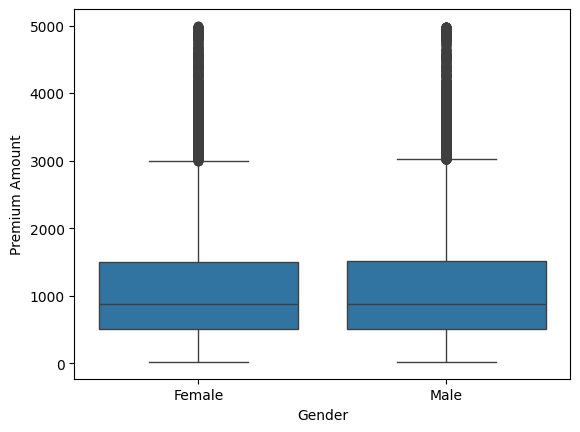

In [ ]:
sns.boxplot(x='Gender', y='Premium Amount', data=df)


In [ ]:
print(df.groupby('Marital Status')['Premium Amount'].mean())

Marital Status
Divorced    1104.546925
Married     1097.571890
Single      1108.342523
Name: Premium Amount, dtype: float64


It seems like all marital status pay the same amount of premium

<Axes: xlabel='Policy Type', ylabel='count'>

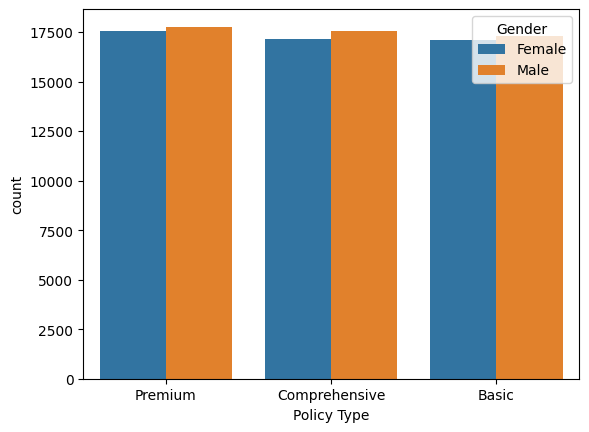

In [ ]:
sns.countplot(x='Policy Type', hue='Gender', data=df)

In [ ]:
df.columns.to_list()

['Age',
 'Gender',
 'Annual Income',
 'Marital Status',
 'Number of Dependents',
 'Education Level',
 'Occupation',
 'Health Score',
 'Location',
 'Policy Type',
 'Previous Claims',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration',
 'Customer Feedback',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type',
 'Premium Amount']

In [ ]:
df.groupby("Location")['Premium Amount'].mean()

,Premium Amount
Location,
Rural,1101.979487
Suburban,1099.644640
Urban,1109.254544


<Axes: xlabel='Smoking Status', ylabel='Premium Amount'>

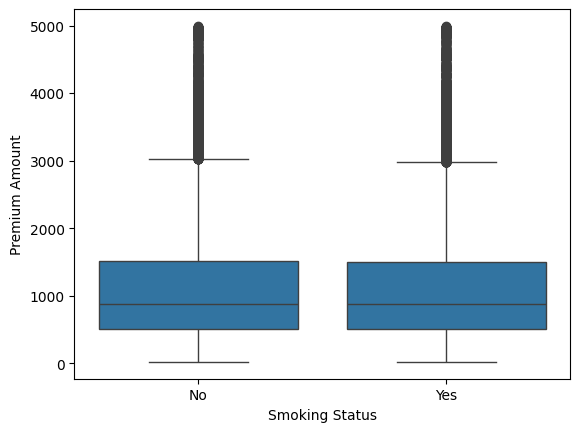

In [ ]:
sns.boxplot(x = "Smoking Status" , y = "Premium Amount" , data = df)

<Axes: xlabel='Gender', ylabel='Premium Amount'>

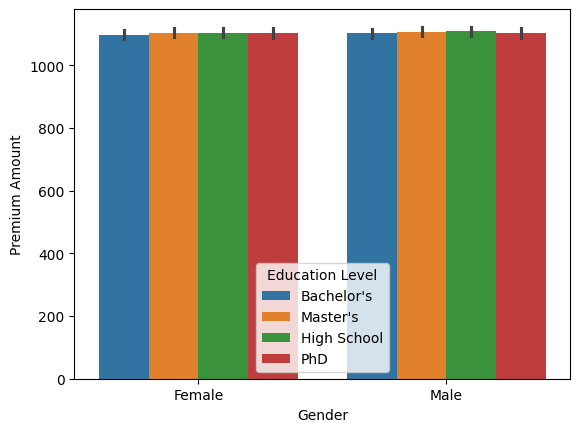

In [ ]:
sns.barplot(x = "Gender", y = "Premium Amount" , hue = "Education Level" , data = df)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import pandas as pd


onehot = ["Gender", "Marital Status", "Location", "Policy Type", "Smoking Status",
          "Exercise Frequency", "Property Type" , "Occupation"]
ordinal = ["Education Level", "Customer Feedback"]

# Define encoders for ordinal features
education_encoder = OrdinalEncoder(categories=[["High School", "Bachelor's", "Master's", "PhD"]])
feedback_encoder = OrdinalEncoder(categories=[["Poor", "Average", "Good"]])

# One-hot encode the categorical features in 'onehot'
df = pd.get_dummies(df, columns=onehot, drop_first=True)

# Ordinal encode the 'Education Level'
df["Education_encoded"] = education_encoder.fit_transform(df[["Education Level"]])

# Ordinal encode the 'Customer Feedback'
df["Customer_Feedback_encoded"] = feedback_encoder.fit_transform(df[["Customer Feedback"]])

# Drop original ordinal columns
df.drop(columns=ordinal, inplace=True)

df.head()


,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Gender_Male,Marital Status_Married,Marital Status_Single,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House,Occupation_Self-Employed,Occupation_Unemployed,Education_encoded,Customer_Feedback_encoded
0,19,10049,1,22,2,17,372,5,2869,False,True,False,False,True,False,True,False,False,False,True,False,True,True,False,1.0,0.0
1,39,31678,3,15,1,12,694,2,1483,False,False,False,False,False,True,False,True,True,False,False,False,True,False,False,2.0,1.0
2,23,25602,3,47,1,14,593,3,567,True,False,False,True,False,False,True,True,False,False,True,False,True,True,False,0.0,2.0
3,21,141855,2,10,1,0,367,1,765,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,1.0,0.0
4,21,39651,1,20,0,8,598,4,2022,True,False,True,False,False,False,True,True,False,False,True,False,True,True,False,1.0,0.0


In [ ]:
# Selecting the columns to encode
cols_to_encode = [
    "Gender_Male",
    "Marital Status_Married",
    "Marital Status_Single",
    "Location_Suburban",
    "Location_Urban",
    "Policy Type_Comprehensive",
    "Policy Type_Premium",
    "Smoking Status_Yes",
    "Exercise Frequency_Monthly",
    "Exercise Frequency_Rarely",
    "Exercise Frequency_Weekly",
    "Property Type_Condo",
    "Property Type_House"
]

# Apply the mapping to each column
for col in cols_to_encode:
    df[col] = df[col].map({True: 1, False: 0})


df.head(2)


,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Gender_Male,Marital Status_Married,Marital Status_Single,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House,Occupation_Self-Employed,Occupation_Unemployed,Education_encoded,Customer_Feedback_encoded
0,19,10049,1,22,2,17,372,5,2869,0,1,0,0,1,0,1,0,0,0,1,0,1,True,False,1.0,0.0
1,39,31678,3,15,1,12,694,2,1483,0,0,0,0,0,1,0,1,1,0,0,0,1,False,False,2.0,1.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Define bin edges and labels
bin_edges = [17, 25, 35, 45, 55, 65]  # Correct variable name
labels = ["18-24", "25-34", "35-44", "45-54", "55-64"]

# Age binning
df["Age_Bin"] = pd.cut(df["Age"], bins=bin_edges, labels=labels)

# Ordinal encoding of the age bins
age_encoder = OrdinalEncoder(categories=[labels])  # Ensure the order matches the labels
df["Age_encoded"] = age_encoder.fit_transform(df[["Age_Bin"]])


In [ ]:
df.drop(columns={"Age"} , inplace=True)

In [ ]:
# bin edges and labels for 'Vehicle Age'
bin_edges = [0, 5, 10, 15, 20, 25]
labels = ["0-5 years", "6-10 years", "11-15 years", "16-20 years", "21+ years"]

df["Vehicle_Age_Bin"] = pd.cut(df["Vehicle Age"], bins=bin_edges, labels=labels, right=False)

# Ordinal encoding of the vehicle age bins
age_encoder = OrdinalEncoder(categories=[labels])
df["Vehicle_Age_encoded"] = age_encoder.fit_transform(df[["Vehicle_Age_Bin"]])


In [ ]:
df.drop(columns={"Vehicle Age"} , inplace=True)

In [ ]:
df.drop(columns={"Age_Bin" , "Vehicle_Age_Bin"} , inplace=True)

In [ ]:
df.head(3)

,Annual Income,Number of Dependents,Health Score,Previous Claims,Credit Score,Insurance Duration,Premium Amount,Gender_Male,Marital Status_Married,Marital Status_Single,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House,Occupation_Self-Employed,Occupation_Unemployed,Education_encoded,Customer_Feedback_encoded,Age_encoded,Vehicle_Age_encoded
0,10049,1,22,2,372,5,2869,0,1,0,0,1,0,1,0,0,0,1,0,1,True,False,1.0,0.0,0.0,3.0
1,31678,3,15,1,694,2,1483,0,0,0,0,0,1,0,1,1,0,0,0,1,False,False,2.0,1.0,2.0,2.0
2,25602,3,47,1,593,3,567,1,0,0,1,0,0,1,1,0,0,1,0,1,True,False,0.0,2.0,0.0,2.0


In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

# Scaling the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Split the data
X = df.drop(columns=["Premium Amount"])
y = df["Premium Amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature selection using RFE with Lasso (L1 regularization)
lasso = Lasso(alpha=0.1)  # You can adjust alpha for Lasso
selector = RFE(lasso, n_features_to_select=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    # "Random Forest": RandomForestRegressor(n_estimators=100),
    # "Gradient Boosting": GradientBoostingRegressor(),
    # "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    # "SVR": SVR(kernel='rbf', C=1.0)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    # Fit the model on selected features (after RFE)
    model.fit(X_train_selected, y_train)
    print(name)
    print()
    y_pred = model.predict(X_test_selected)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "MAE": mae, "R2 Score": r2}

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R2 Score", ascending=False)
print(results_df)


Linear Regression

Ridge

Lasso

Decision Tree

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26
[LightGBM] [Info] Number of data points in the train set: 83550, number of used features: 10
[LightGBM] [Info] Start training from score 1103.821041
LightGBM

                             MSE         MAE  R2 Score
Lasso              763705.274714  674.637750  0.000909
Ridge              763722.472953  674.652787  0.000886
Linear Regression  763722.499026  674.652804  0.000886
Decision Tree      764453.066972  674.793591 -0.000069
LightGBM           766003.408417  675.528631 -0.002098
